In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [202]:
x = np.random.uniform(-4,4,500)       
y = x + np.random.standard_normal(500)+2.5

In [205]:
x = np.array([61789, 22899, 68500, 54000, 65674, 60949, 93000, 48235, 76025, 67000, 97500, 74000, 63060, 82029, 84000, 144500, 89000, 166800, 114800, 176000, 185530, 150500, 139800, 240000])
y = np.array([8290, 7990, 7990, 7990, 7555, 7490, 6990, 6900, 6900, 6800, 6800, 6600, 6390, 6390, 6200, 5999, 5990, 5800, 5350, 5250, 4450, 4400, 3800, 3650])


In [206]:
y

array([8290, 7990, 7990, 7990, 7555, 7490, 6990, 6900, 6900, 6800, 6800,
       6600, 6390, 6390, 6200, 5999, 5990, 5800, 5350, 5250, 4450, 4400,
       3800, 3650])

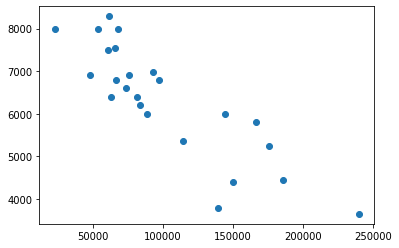

In [207]:
plt.plot(x, y, 'o')
plt.show()

In [208]:
def cost(X, Y, theta):
    J=np.dot((np.dot(X,theta) - Y).T,(np.dot(X,theta) - Y))/(2*len(Y))
    return J


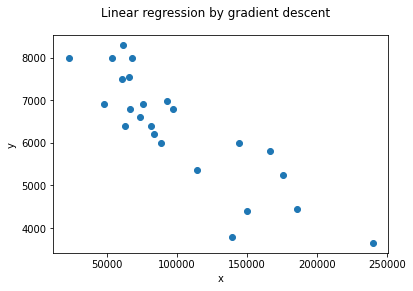

[[-4.44361311e+84]
 [-5.66007072e+89]]


In [209]:
# In this solution calculation of a variable (b) fails.
# the value is extremely high and that leads wrong result.


plt.plot(x, y, 'o')

alpha = 0.1 # Specify the learning rate
theta =  np.array([[0,0]]).T # Initial values of theta

X = np.c_[np.ones(len(x)),x]
Y = np.c_[y]
X_1=np.c_[x].T
num_iters = 10
cost_history=[]
theta_history=[]
for i in range(num_iters):
    a=np.sum(theta[0] - alpha * (1/len(Y)) * np.sum((np.dot(X,theta)- Y)))
    b=np.sum(theta[1] - alpha * (1/len(Y)) * np.sum(np.dot(X_1,(np.dot(X,theta)-Y))))
    theta= np.array([[a],[b]])
    cost_history.append(cost(X,Y,theta))
    theta_history.append(theta)
    if i in (1,3,7,10,14,num_iters): 
#         plt.plot(x, a+x*b)
        plt.suptitle('Linear regression by gradient descent')
        plt.xlabel('x')
        plt.ylabel('y')
plt.show()
print(theta)

[0 0]
theta
[0 0]
E
ccccc
-3647136.0
0.06331833333333334
E
b
139896.6061
E
theta
[[6.33183333e-02]
 [1.39896606e+05]]
E
ccccc
339331656827.61865
-3393316.5049578534
E
b
-18009241989.33064
E
theta
[[-3.3933165e+06]
 [-1.8009242e+10]]
E
ccccc
-4.368303735849206e+16
436826980268.4158
E
b
2318375774278588.0
E
theta
[[4.36826980e+11]
 [2.31837577e+15]]
E
ccccc
5.623429104816248e+21
-5.623385422118221e+16
E
b
-2.984504419415622e+20
E
theta
[[-5.62338542e+16]
 [-2.98450442e+20]]
E
ccccc
-7.239184088186463e+26
7.239127854332243e+21
E
b
3.842028858450725e+25
E
theta
[[7.23912785e+21]
 [3.84202886e+25]]
E
ccccc
9.3191867961434e+31
-9.319114404864857e+26
E
b
-4.9459419973177604e+30
E
theta
[[-9.3191144e+26]
 [-4.9459420e+30]]
E
ccccc
-1.1996827471639861e+37
1.1996734280495814e+32
E
b
6.367037610096423e+35
E
theta
[[1.19967343e+32]
 [6.36703761e+35]]
E
ccccc
1.5443822785465946e+42
-1.544370281812314e+37
E
b
-8.196450332488172e+40
E
theta
[[-1.54437028e+37]
 [-8.19645033e+40]]
E
ccccc
-1.9881227999

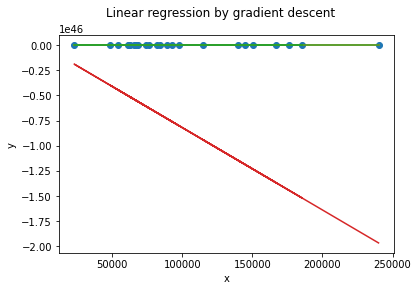

[[-2.55934144e+47]
 [-1.35832159e+51]]


In [211]:
plt.plot(x, y, 'o')

alpha = 0.00001 # Specify the learning rate
theta =  np.array([0,0]) # Initial values of theta

X = np.c_[np.ones(len(x)),x]
Y = np.c_[y]
X_1=np.c_[x].T
num_iters = 10
cost_history=[]
theta_history=[]
print(theta)
for i in range(num_iters):
    print('theta')
    print(theta)
    print('E')
    a = np.sum(theta[0] - alpha * (1/len(Y)) * np.sum((np.dot(X,theta) - y)))
    print('ccccc')
    print(np.sum(np.dot(X,theta) - Y))
    print(a)
    print('E')
    b = np.sum(theta[1] - alpha * (1/len(Y)) * np.sum(np.dot(X_1,(np.dot(X,theta)-Y))))
    theta = np.array([[a],[b]])
    print('b')
    print(b)
    print('E')
#     cost_history.append(cost(X,Y,theta))
    theta_history.append(theta)
    if i in (1,3,7,10,14,num_iters): 
        plt.plot(x, a+x*b)
        plt.suptitle('Linear regression by gradient descent')
        plt.xlabel('x')
        plt.ylabel('y')
plt.show()
print(theta)

In [69]:
print(Y)
print(y)
print(Y.T)
print(theta)


[[8290]
 [7990]
 [7990]
 [7990]
 [7555]
 [7490]
 [6990]
 [6900]
 [6900]
 [6800]
 [6800]
 [6600]
 [6390]
 [6390]
 [6200]
 [5999]
 [5990]
 [5800]
 [5350]
 [5250]
 [4450]
 [4400]
 [3800]
 [3650]]
[8290 7990 7990 7990 7555 7490 6990 6900 6900 6800 6800 6600 6390 6390
 6200 5999 5990 5800 5350 5250 4450 4400 3800 3650]
[[8290 7990 7990 7990 7555 7490 6990 6900 6900 6800 6800 6600 6390 6390
  6200 5999 5990 5800 5350 5250 4450 4400 3800 3650]]
[[[[-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]
   [-5.89117724e+11]]]


 [[[-7.50391155e+16]
   [-7.50391155e+16]
   [-7.5

In [33]:
len(Y)

500